# Titanic Survival Prediction - Final Report

This notebook summarizes the end-to-end workflow for predicting survival on the Titanic dataset.

### Steps:
1. Data Cleaning & Feature Engineering
2. Exploratory Data Analysis (EDA)
3. Modeling & Evaluation
4. Results & Conclusion


In [34]:
import pandas as pd

df = pd.read_csv("../data/processed/titanic_clean.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeBin,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,Adult,Q1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,Adult,Q4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,Adult,Q2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,Adult,Q4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,Adult,Q2


We use the **cleaned dataset** with engineered features:
- `FamilySize`, `IsAlone`
- `Title` extracted from passenger names
- `AgeBin`, `FareBin` created for grouping


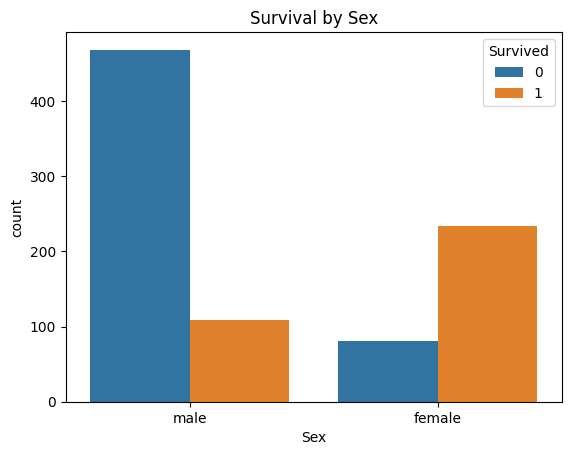

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Sex")
plt.show()


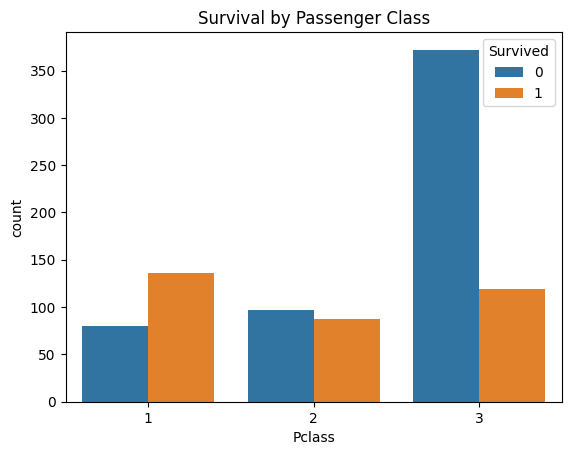

In [36]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()


Observation:
- Females had a much higher survival rate than males.
- Higher class passengers (1st class) had significantly higher chances of survival.


In [52]:
results = pd.read_csv(r"C:\Users\hasti_aksoy\OneDrive\Desktop\regression-classification-project\regression-classification-project\reports\figures\model_comparison.csv")
results


,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Elastic Net (l1=0.5),0.844,0.825,0.754,0.788,0.872
1,Lasso (L1),0.844,0.825,0.754,0.788,0.872
2,Ridge (L2),0.844,0.825,0.754,0.788,0.871
3,Logistic (baseline),0.844,0.825,0.754,0.788,0.871


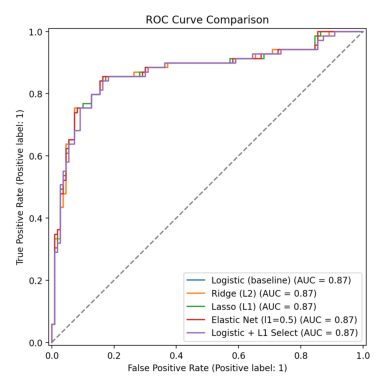

In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\hasti_aksoy\OneDrive\Desktop\regression-classification-project\regression-classification-project\reports\figures\roc_comparison_all.png")
plt.imshow(img)
plt.axis("off")
plt.show()


Here we compare Logistic Regression, Ridge, Lasso, and Elastic Net.  
**Elastic Net Logistic Regression** achieved the best ROC-AUC score.


In [56]:
feat_imp = pd.read_csv(r"C:\Users\hasti_aksoy\OneDrive\Desktop\regression-classification-project\regression-classification-project\reports\figures\selected_features_l1.csv")
feat_imp.head(10)


,SelectedFeatures
0,Pclass
1,Age
2,SibSp
3,Fare
4,FamilySize
5,IsAlone
6,Sex_female
7,Sex_male
8,Embarked_Q
9,Embarked_S


The most important features include:
- `Sex_female`
- `Pclass`
- `Title_Mr`
- `Fare`
- `FamilySize`


In [40]:
import joblib

best_model = joblib.load("../models/best_pipeline.joblib")
print(best_model)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare',
                                                   'FamilySize', 'IsAlone']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked', 'Title',
                                                   'AgeBin', 'FareBin'])])),
                ('select',
                 SelectFromModel(estimator=LogisticRegression(C=0.5,
                                                              max_iter=4000,
                                                              penalty='l1',
                                                              solver='saga'))),
                ('clf', LogisticRegression(ma

✅ **Best Model: Elastic Net Logistic Regression**

- Accuracy: 0.844  
- Precision: 0.825  
- Recall: 0.754  
- F1-score: 0.788  
- ROC-AUC: 0.872


## Conclusion
- Key predictors of survival: **Sex**, **Pclass**, and **Title**.
- Family-related features also improved model performance.
- Elastic Net Logistic Regression was the best performing model.
- This project demonstrates the complete workflow: from raw data → cleaning → EDA → modeling → evaluation → saving models.
